**Import necessary libraries**

In [1]:
import cv2 as cv
import os
import matplotlib.pyplot as plt

**Define imort,export directories and constants**

In [2]:
path_of_the_directory = 'Spectogram Folder Path'
path_of_the_export_directory = 'Preprocessed Spectogram Folder Path'
if(not os.path.exists(path_of_the_export_directory)):
    os.mkdir(path_of_the_export_directory)
spectogram_category_count = 10
ext = ('.png')

**Show an example image before filtering**


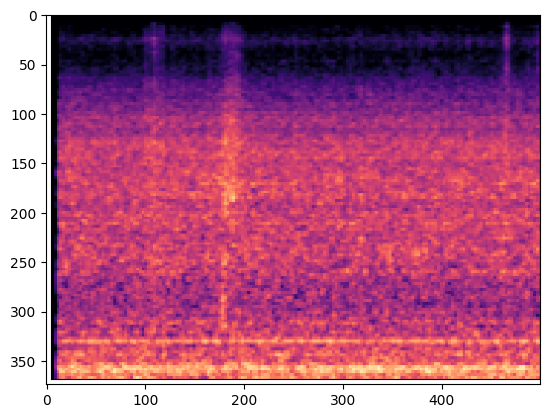

In [3]:
img = cv.imread(path_of_the_directory+"/0/100852-0-0-0.png")
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

**Define preprocess function**

In [4]:
def image_filter(img_path):
    img = cv.imread(img_path)
    normalized = cv.normalize(img, None, alpha=0, beta=255, norm_type=cv.NORM_MINMAX, dtype=cv.CV_8U)
    gray_scaled = cv.cvtColor(normalized, cv.COLOR_BGR2GRAY)
    resized = cv.resize(gray_scaled,None,fx=0.25, fy=0.25)
    
    return resized

**Iterate over whole 'spectrograms' directory and filter each image**

In [5]:
for i in range(spectogram_category_count) :
    object = os.scandir(path_of_the_directory+'/'+str(i))
    os.makedirs(path_of_the_export_directory+'/'+str(i), exist_ok=True)
    for n in object:
        if n.is_dir() or n.is_file():
            filtered_img = image_filter(path_of_the_directory+'/'+str(i)+'/'+n.name)
            cv.imwrite(path_of_the_export_directory+'/'+str(i)+'/'+n.name, filtered_img)
    object.close()

**Show an example preprocessed image**

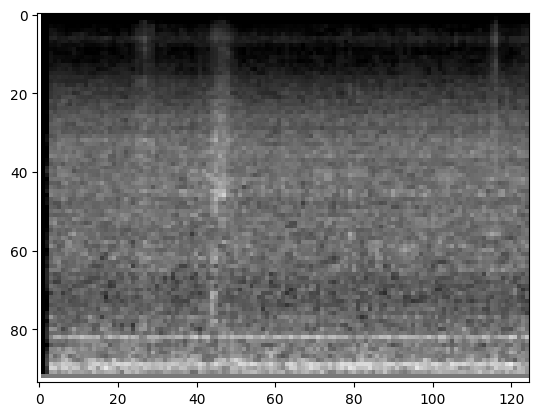

In [6]:
img2 = cv.imread(path_of_the_export_directory+"/0/100852-0-0-0.png")
plt.imshow(cv.cvtColor(img2, cv.COLOR_BGR2RGB))